In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
IMAGE_SIZE = 224
BATCH_SIZE = 32

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\ADIL SHAIKH\Downloads\.ipynb_checkpoints\PlantVillage",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 20638 files belonging to 15 classes.


In [5]:
class_name = dataset.class_names
class_name

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [6]:
len(dataset)

645

In [7]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 224, 224, 3)
[ 1  0  5 12 12  1  1  1  8  8 12  1  5 11 12  9 10  5  8  9  5  5 12 12
 12 12 12 14  7  2  8  5]


In [8]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0])

tf.Tensor(
[[[133.41327  124.41326  127.41326 ]
  [136.51021  127.51021  130.51021 ]
  [137.09183  128.09183  131.09183 ]
  ...
  [170.85202  164.85202  168.85202 ]
  [167.96938  161.96938  165.96938 ]
  [164.63771  158.63771  162.63771 ]]

 [[127.19898  118.198975 121.19898 ]
  [134.36224  125.36224  128.36224 ]
  [131.65817  122.658165 125.658165]
  ...
  [171.7092   165.7092   169.7092  ]
  [171.35713  165.35713  169.35713 ]
  [169.48466  163.48466  167.48466 ]]

 [[137.36736  128.36734  131.36736 ]
  [136.13776  127.13776  130.13776 ]
  [138.89285  129.89285  132.89285 ]
  ...
  [167.34186  161.34186  165.34186 ]
  [167.14285  161.14285  165.14285 ]
  [165.99998  159.99998  163.99998 ]]

 ...

 [[166.61203  161.61203  168.61203 ]
  [148.90347  143.90347  150.90347 ]
  [150.64278  145.64278  152.64278 ]
  ...
  [183.34189  180.34189  187.34189 ]
  [184.43372  181.43372  188.43372 ]
  [184.9031   181.9031   188.9031  ]]

 [[156.70917  151.70917  158.70917 ]
  [149.08662  144.08662  1

# This is in tensor(tf) .Now lets covert into numpy

In [9]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[ 91.55612   96.55612   90.55612 ]
  [ 99.015305 104.015305  98.015305]
  [105.418365 110.418365 104.418365]
  ...
  [135.48482  140.12769  143.12769 ]
  [132.85199  140.99487  140.85199 ]
  [113.95376  122.95376  121.95376 ]]

 [[103.89796  108.89796  102.89796 ]
  [108.57143  113.57143  107.57143 ]
  [113.63776  118.63776  112.63776 ]
  ...
  [131.53577  136.17863  139.17863 ]
  [130.86223  139.00511  138.86223 ]
  [123.045784 132.04579  131.04579 ]]

 [[109.408165 114.408165 108.408165]
  [108.10715  113.10715  107.10715 ]
  [109.78061  114.78061  108.78061 ]
  ...
  [126.95407  131.59694  134.59694 ]
  [126.34694  133.64798  133.7857  ]
  [127.87758  136.80107  135.82657 ]]

 ...

 [[ 95.903076  96.903076  91.903076]
  [100.20411  100.98982   96.632675]
  [104.15821  104.15821  102.15821 ]
  ...
  [125.10204  124.10204  129.10205 ]
  [124.92348  123.92348  128.92348 ]
  [125.92859  124.92859  129.92859 ]]

 [[ 99.48472  100.48472   95.48472 ]
  [105.00003  105.78575  101.428604]


# THE above dataset show that all the color  is represent by 0 to 223

In [10]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].shape)

(224, 224, 3)


# Lets visualize the image

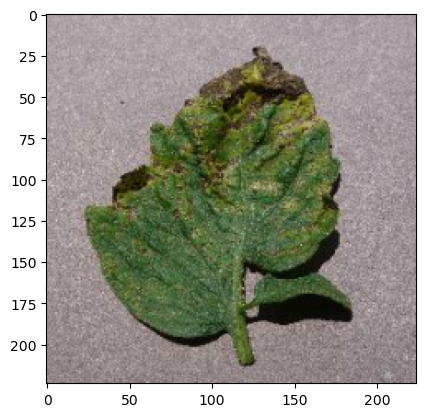

In [11]:
for image_batch, label_batch in dataset.take(1):
    
    plt.imshow(image_batch[0].numpy().astype("uint8"))

# lets dont consider a axis . Just count as a normal picture

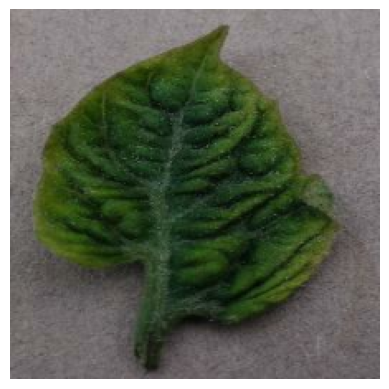

In [12]:
for image_batch, label_batch in dataset.take(1):
    
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.axis("off")

# DUE TO INSERTION OF "shuffle".It change its image due to shuffle=True

# lets creates more pictures Entity

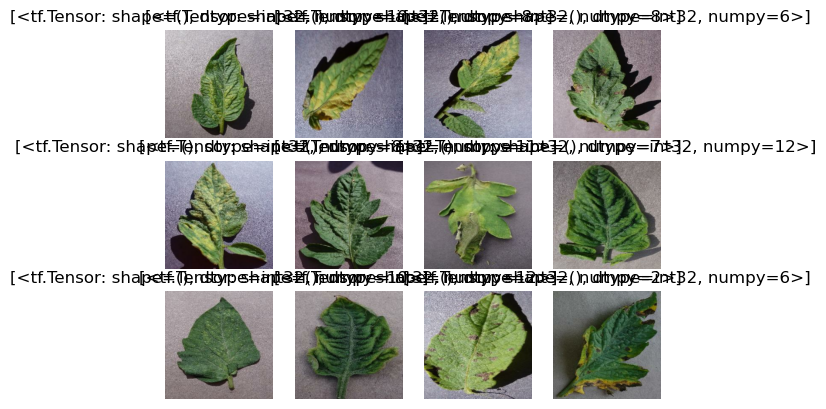

In [13]:
for image_batch, label_batch in dataset.take(1): 
    for i in range(12): 
        ax = plt.subplot(3,4,i+1) 
        plt.imshow(image_batch[i].numpy().astype("uint8")) 
        plt.title([label_batch[i]]) 
        plt.axis("off")

# Thus the name is overlaping let make distance equal to all

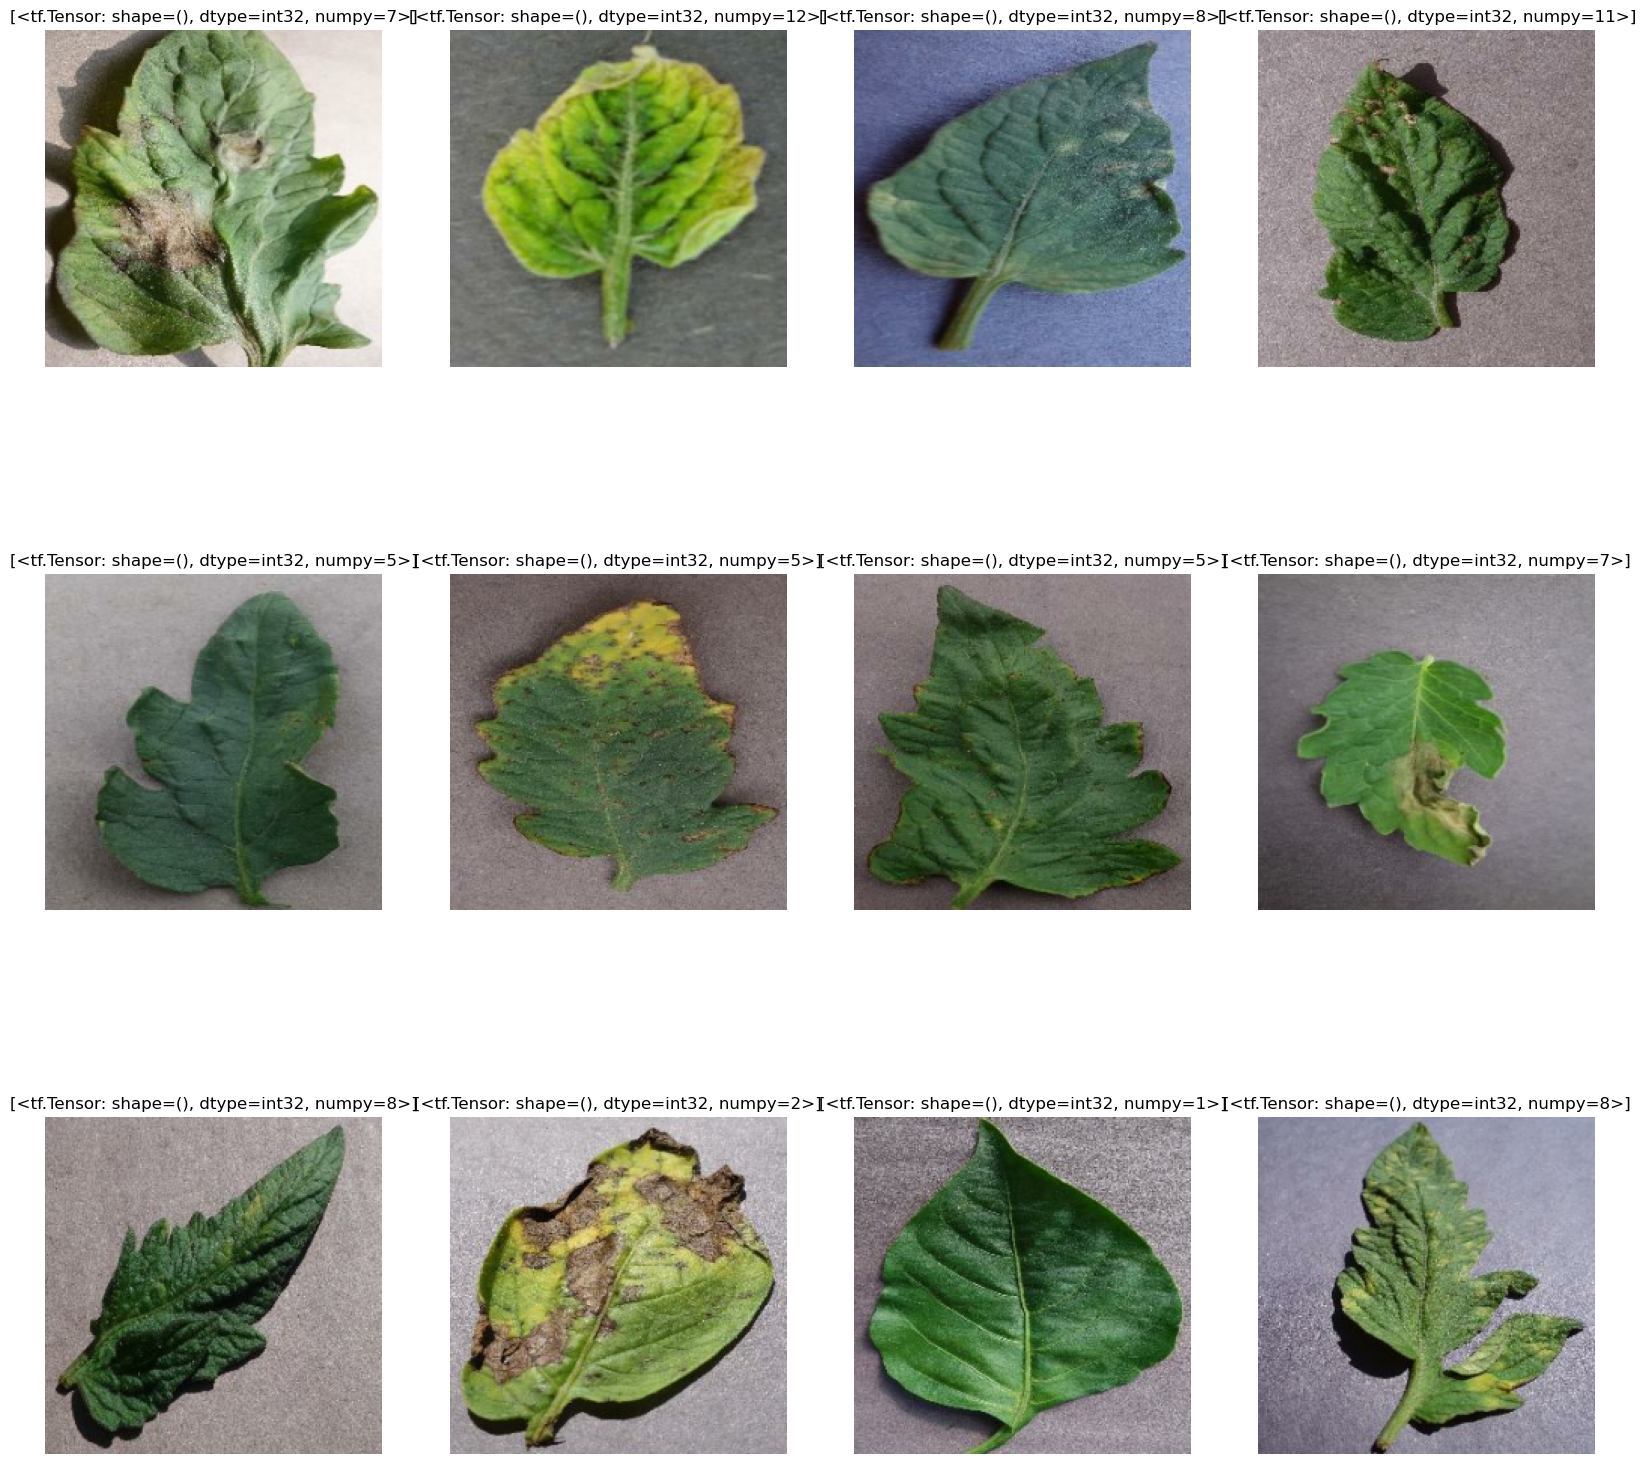

In [17]:
plt.figure(figsize=(20, 20))
for image_batch, label_batch in dataset.take(1): 
    for i in range(12): 
        ax = plt.subplot(3,4,i+1) 
        plt.imshow(image_batch[i].numpy().astype("uint8")) 
        plt.title([label_batch[i]]) 
        plt.axis("off")

# Now going for test,train,validation

In [18]:
IMAGE_SIZE = 224
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [ ]:
80 ==> training
20==> 10% validation, 10% test

In [19]:
train_size = 0.8
len(dataset)*train_size

516.0

In [20]:
train_ds= dataset.take(516)
len(train_ds)

516

In [21]:
test_ds = dataset.skip(54)
len(test_ds)

591

In [22]:
val_size=0.1
len(dataset)*val_size

64.5

In [23]:
val_ds = test_ds.take(64)
len(val_ds)

64

In [24]:
test_ds = test_ds.skip(6)
len(test_ds)

585

In [25]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
                              
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
        
        train_size = int(train_split * ds_size)
        val_size = int(val_split * ds_size)
        
        train_dsds.take(train_size)
        
        val_ds = ds.skip(train_size).take(val_size)
        test_ds = ds.skip(train_size).skip(val_size)
        
        return train_ds, val_ds, test_ds

In [26]:
len(train_ds)

516

In [27]:
len(val_ds)

64

In [28]:
len(test_ds)

585

In [80]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE) 
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [81]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [82]:
data_augmentation = tf.keras.Sequential([ 
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"), 
    layers.experimental.preprocessing.RandomRotation(0.2),
])

# NOW USING CNN :- (convolutional neural network) 

In [133]:
# Define the CNN architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [134]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS) 
n_classes=3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape), 
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'), 
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)), 
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation= 'relu' ),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [135]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_10 (Sequential)  (None, 224, 224, 3)       0         
                                                                 
 sequential_11 (Sequential)  (None, 224, 224, 3)       0         
                                                                 
 conv2d_111 (Conv2D)         (32, 222, 222, 32)        896       
                                                                 
 max_pooling2d_104 (MaxPool  (32, 111, 111, 32)        0         
 ing2D)                                                          
                                                                 
 conv2d_112 (Conv2D)         (32, 109, 109, 64)        18496     
                                                                 
 max_pooling2d_105 (MaxPool  (32, 54, 54, 64)          0         
 ing2D)                                              

In [113]:
# Compile the model 
model.compile(optimizer='adam', 
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
metrics=['accuracy'])


In [138]:
history

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
len(train_ds)
IMAGE_SIZE = 224
BATCH_SIZE = 32
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\ADIL SHAIKH\Downloads\.ipynb_checkpoints\PlantVillage",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)
class_name = dataset.class_names
class_name
len(dataset)
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0])
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].shape)
for image_batch, label_batch in dataset.take(1):
    
    plt.imshow(image_batch[0].numpy().astype("uint8"))
for image_batch, label_batch in dataset.take(1):
    
    plt.imshow(image_batch[0].nu

In [92]:
# Check dataset values
unique_labels = np.unique(train_ds)
print(unique_labels)

[<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>]


In [142]:
for images_batch, labels_batch in test_ds.take(1):
    print(images_batch[0].numpy())

[[[148.83163 137.83163 141.83163]
  [154.68367 143.68367 147.68367]
  [152.56633 141.56633 145.56633]
  ...
  [162.97961 151.97961 157.97961]
  [163.53061 152.53061 158.53061]
  [163.5     152.5     158.5    ]]

 [[154.83673 143.83673 147.83673]
  [154.7857  143.7857  147.7857 ]
  [155.92857 144.92857 148.92857]
  ...
  [158.78572 147.78572 153.78572]
  [157.21428 146.21428 152.21428]
  [156.38774 145.38774 151.38774]]

 [[156.23979 145.23979 149.23979]
  [152.29591 141.29591 145.29591]
  [159.07654 148.07654 152.07654]
  ...
  [158.81633 147.81633 153.81633]
  [158.06122 147.06122 153.06122]
  [155.92854 144.92854 150.92854]]

 ...

 [[160.92845 148.92845 148.92845]
  [166.48473 154.48473 154.48473]
  [160.0153  148.0153  148.0153 ]
  ...
  [158.04605 146.04605 150.04605]
  [161.06134 149.06134 153.06134]
  [152.90804 140.90804 144.90804]]

 [[155.7653  143.7653  143.7653 ]
  [162.54587 150.54587 150.54587]
  [159.63776 147.63776 147.63776]
  ...
  [157.796   145.796   149.796  ]
  [1

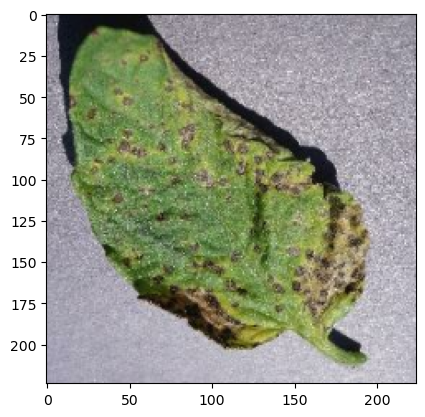

In [143]:
for images_batch, labels_batch in test_ds.take(1):
    plt.imshow(images_batch[0].numpy().astype('uint8'))

# NOW GOING FOR PREDICTION

first image to predict
first image's actual label: 14


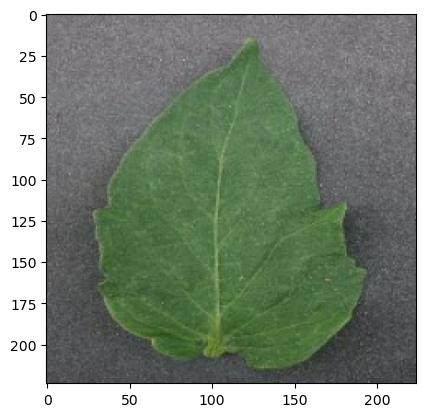

In [156]:
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

print("first image to predict") 
plt.imshow(first_image)
print("first image's actual label:", first_label)

# NOTE:-

# DUE TO 'SHUFFLE'=TRUE ITS CHANGE THE IMAGE ACCORDING DATA 

In [ ]:
1.Pepper_bell_Bacterial_spot

2.Pepper_bell_healthy

3.Potato_Early_blight

4.Potato_healthy

5.Potato_Late_blight

6.Tomato_Target_Spot

7.Tomato_Tomato_mosaic_virus

8.Tomato_Tomato_YellowLeaf_Curt Virus

9.Tomato_Bacterial_spot

10.Tomato_Early_blight

11.Tomato_healthy

12.Tomato_Leaf_Mold

13.Tomato_Septoria_leaf_spot

14.Tomato_Spider_mites_Two_spotted_spid

# BY WATCHING PIC CONSERING HEALTHY OR BACTERIAL

# HENCE WE CONCLUDE AS IMAGE IS DETECTED HEALTHY